In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=np.loadtxt('F:\coursera_,ml\machine-learning-ex2\ex2\ex2data2.txt',delimiter=',')

In [8]:
x=data[:,:2]
y=data[:,2]

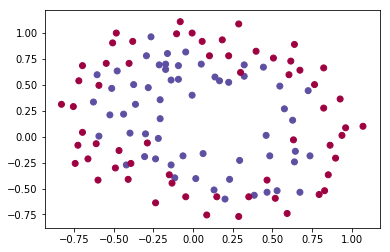

In [11]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Spectral)
plt.show()

In [27]:
x=x.T
y=y.T
y=y.reshape(1,118)

In [18]:
np.random.seed(3)

In [19]:
#cost function
def cost(a,y):
    j=(-1/y.shape[1])*(np.sum(y*np.log(a)+(1-y)*np.log(1-a)))
    return j

In [20]:
#sigmoid function
def sig(x):
    a=1/(1+np.exp(-1*x))
    return a

In [21]:
def relu(x):
    return x*(x>0)

In [22]:
def relu_der(x):
    return 1*(x>0)

In [55]:
alpha=0.0006
c_history=np.zeros((10000,1))

In [56]:
#initializing parameters
w1=np.random.rand(10,2)*0.01
b1=np.random.rand(10,1)
w2=np.random.rand(1,10)*0.01
b2=np.random.rand(1,1)

In [63]:
for i in range(10000):
    #forward propagation
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sig(z2)
    
    #computing cost
    c=cost(a2,y)
    c_history[i]=c
    
    #backward propagation
    dz2=a2-y
    dw2=(1/len(y))*np.dot(dz2,a1.T)
    db2=(1/len(y))*np.sum(dz2, axis=1, keepdims=True)
    dz1=np.dot(w2.T,dz2)*(1-a1*a1)
    dw1=(1/len(y))*np.dot(dz1,x.T)
    db1=(1/len(y))*np.sum(dz1, axis=1, keepdims=True)
    
    #gradient descent
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2

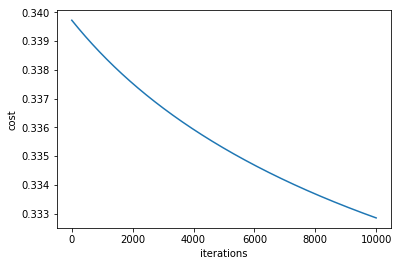

In [64]:
#cost vs iterations
xa=np.arange(1,10001,1)
plt.plot(xa,c_history)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [65]:
pre=np.round(a2)

In [66]:
c=0
for i in range(len(y.T)):
    if y.T[i]==pre.T[i]:
        c=c+1
print(str(c/len(y.T)*100)+'%')

87.28813559322035%


In [67]:
def predict(x):
    x=x.T
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sig(z2)
    pre=np.round(a2)
    return pre

In [68]:
#function for plotting desicion boundary
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

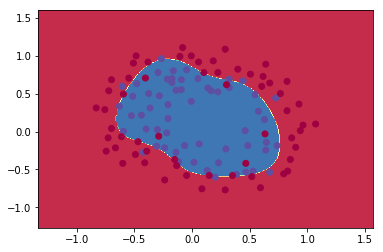

In [71]:
plot_decision_boundary(lambda x: predict(x), x.T, y[0])